In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    response = requests.get(url)

    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [6]:
#Data for sentiment analysis
from textblob import TextBlob

df = pd.DataFrame()
df["reviews"] = reviews

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity: -1 (negative) až 1 (positive)

df["sentiment"] = df["reviews"].apply(analyze_sentiment)

print(df.head())
df.to_csv("BA_reviews_with_sentiment.csv", index=False)

                                             reviews  sentiment
0  ✅ Trip Verified |   London Heathrow to Male In...   0.300758
1  Not Verified |  Very good flight following an ...   0.344286
2  Not Verified |  An hour's delay due to late ar...   0.122222
3  ✅ Trip Verified |   I booked through BA becaus...   0.078906
4  ✅ Trip Verified |   British airways lost bags ...  -0.066667


In [7]:
df_scr_sent = pd.read_csv("BA_reviews_with_sentiment.csv")

In [19]:
def clean_data(df_scr_sent):
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("✅ Trip Verified | ","", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("✅ Trip Verified |   ","", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("✅ Trip Verified |","", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("Not Verified | ","", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("❎ ", "", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("✅ Verified Review | ","", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("Unverified |  ", "", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.replace("✅ Verified Review |","", case=False, regex=False)
    df_scr_sent['reviews'] = df_scr_sent['reviews'].str.lstrip()

    return df_scr_sent

df_scr_sent_clean = clean_data(df_scr_sent.copy())

In [18]:
df_scr_sent_clean.to_csv("BA_reviews_with_sentiment_cleaned.csv", index=False)

In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


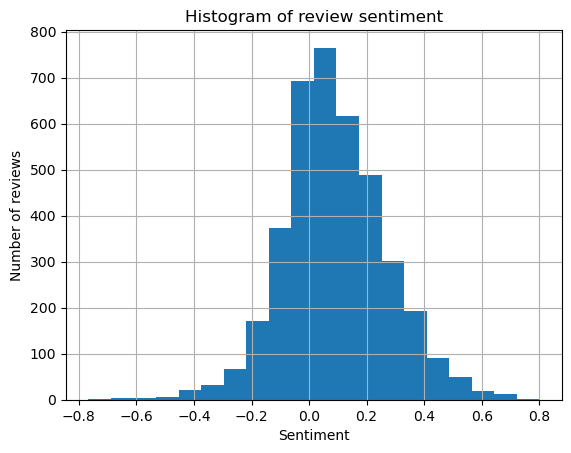

Percentage of positive reviews:: 69.33%
Percentage of negative reviews:: 30.16%


In [10]:
import matplotlib.pyplot as plt
df_scr_sent_clean["sentiment"].hist(bins=20)
plt.title("Histogram of review sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of reviews")
plt.show()
print(f"Percentage of positive reviews:: {(df['sentiment'] > 0).mean() * 100:.2f}%")
print(f"Percentage of negative reviews:: {(df['sentiment'] < 0).mean() * 100:.2f}%")

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


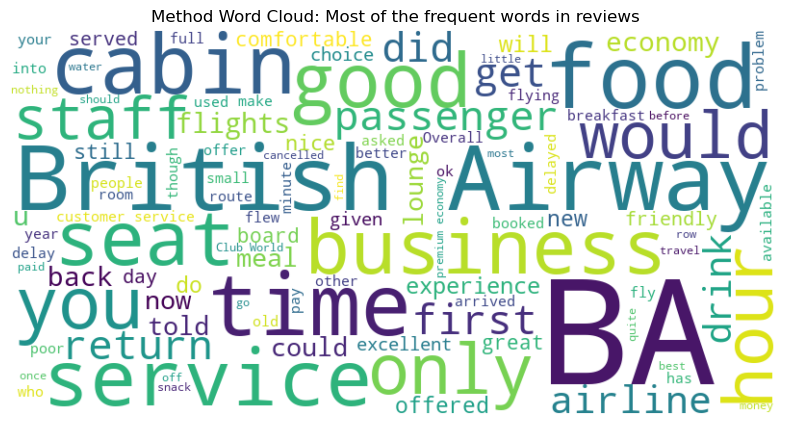

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df_scr_sent_clean["reviews"])

#Stopwords filter
stopwords = [
    'and', 'in', 'seats', 'on', 'the', 'just', 'my', 'flight', 'plane', 'ha',
    'crew', 'aircraft', 'class', 'trip', 'way', 'leg', 'legs', 'luggage', 'bag', 
    'bags','baggage', 'ticket', 'tickets', 'check', 'check-in', 'checkin', 'boarding',
    'airport', 'airports', 'air', 'line', 'lines', 'terminal', 'terminals', 'use',
    'gate', 'gates', 'london', 'heathrow', 'gatwick', 'jfk', 'lax', 'lhr', 'lgw', 'them',
    'by', 'I', 'that', 'from', 'did not', 'I was', 'same', 'some', 'there was', 'been',
    'it was', 'we had', 'had to', 'over', 'so', 'it i', 'any to', 'both', 'also',
    'last', 'with a', 'however', 'for a', 'to get', 'have been', 'were', 'got', 'where',
    'was very', 'which', 'two', 'had a', 'left', 'but', 'was not', 'in a', 'even',
    'this', 'a', 'of', 'they', 'for', 'is', 'we', 'to be', 'with', 'at', 'all', 'told'
    'only', 'when', 'after', 'very', 'then', 'if', 'again', 'what', 'about',
    'another', 'although', 'so', 'any', 'out', 'no', 'me', 'on', 'one', 'or', 'am',
    'our', 'their', 'to', 'it', 'was', 'be', 'are', 'by', 'an', 'as', 'like', 'did'
    'just', 'have', 'being', 'its', 'too', 'made', 'really', 'also', 'much', 'up',
    'well', 'few', 'such', 'which', 'not', 'had', 'there', 'because', 'more', 'due'
]

wordcloud = WordCloud(width=800, height=400,
                        background_color="white",
                        stopwords=stopwords,    
                        colormap="viridis",
                        max_words=100).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Method Word Cloud: Most of the frequent words in reviews")
plt.show()
